In [66]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
from scipy.ndimage import interpolation as inter

In [67]:
class preprocessing:
    def __init__(self):
        self.pic=glob('images/*.jpg')
        self.img=cv2.imread(pic[0])
        
    def img_size(self):
        print(self.img.shape)
        
    def view(self):
        plt.imshow(self.img)
        
    def aspect_ratio_resize(self, width=None, height=None, inter=cv2.INTER_AREA):
        dim = None
        (h, w) = self.img.shape[:2]

        if width is None and height is None:
            return self.img

        if width is None:
            r = height / float(h)
            dim = (int(w * r), height)
        
        else:
            r = width / float(w)
            dim = (width, int(h * r))

        self.img= cv2.resize(self.img, dim, interpolation=inter)
    
    def correct_skew(self, delta=1, limit=5):
        def determine_score(arr, angle):
            data = inter.rotate(arr, angle, reshape=False, order=0)
            histogram = np.sum(data, axis=1, dtype=float)
            score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
            return histogram, score

        gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

        scores = []
        angles = np.arange(-limit, limit + delta, delta)
        for angle in angles:
            histogram, score = determine_score(thresh, angle)
            scores.append(score)

        best_angle = angles[scores.index(max(scores))]

        (h, w) = self.img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
        rotated = cv2.warpAffine(self.img, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)
        
        self.img=rotated
        return best_angle
    
    
obj=preprocessing()


In [68]:
obj.img_size()

(854, 1280, 3)


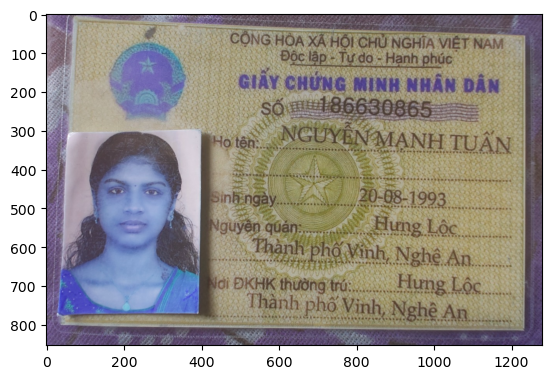

In [69]:
obj.view()

In [71]:
obj.aspect_ratio_resize(800)

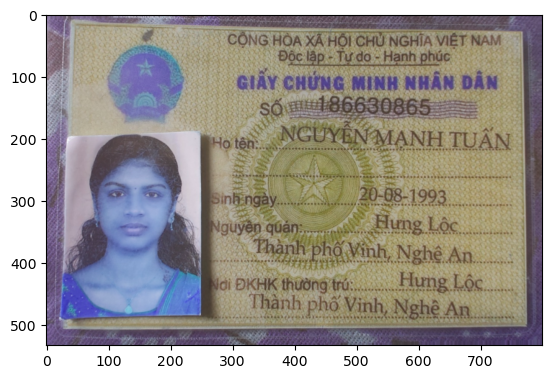

In [72]:
obj.view()

C:\Users\Arun\AppData\Local\Temp\ipykernel_9240\1936131993.py:31: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)


1
0


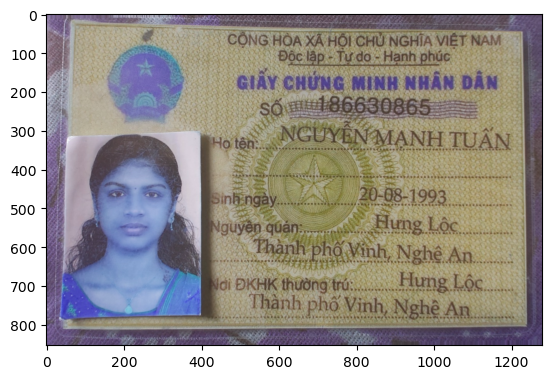

In [70]:
while True:
    angle= obj.correct_skew()
    print(angle)
    if angle==0:
        break
obj.view()